In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.dataset.common import ListDataset
from gluonts.evaluation import Evaluator

import numpy as np
import mxnet as mx
np.random.seed(7)
mx.random.seed(7)

from statsmodels.tsa.ar_model import AutoReg, AutoRegResults

/Users/arthurboivert/venv38/lib/python3.8/site-packages/gluonts/model/deepar/__init__.py:18: FutureWarning: The module gluonts.model.deepar has been moved to gluonts.mx.model.deepar. In GluonTS v0.12 it will be no longer possible to use the old path. Try to use 'from gluonts.mx import DeepAREstimator'.
  warnings.warn(


In [3]:
data = pd.read_csv("test.csv", index_col=[1])

In [4]:
data.columns.str.match("Unnamed")
data=data.loc[:,~data.columns.str.match("Unnamed")]
data

,temp,wetb,dewpt,vappr,rhum
date,,,,,
2019-05-08 12:00:00,10.1,7.5,4.4,8.4,67.0
2019-05-09 12:00:00,11.4,7.9,3.6,7.9,58.0
2019-05-10 12:00:00,10.9,8.5,5.9,9.3,71.0
2019-05-11 12:00:00,13.0,7.8,0.6,6.4,42.0
2019-05-12 12:00:00,12.9,9.9,6.6,9.7,65.0
...,...,...,...,...,...
2022-01-27 12:00:00,10.3,9.1,7.9,10.7,85.0
2022-01-28 12:00:00,10.1,9.7,9.3,11.7,94.0
2022-01-29 12:00:00,9.9,7.7,5.1,8.8,72.0


In [5]:
data_train = data[:800]
data_test = data[-200:]

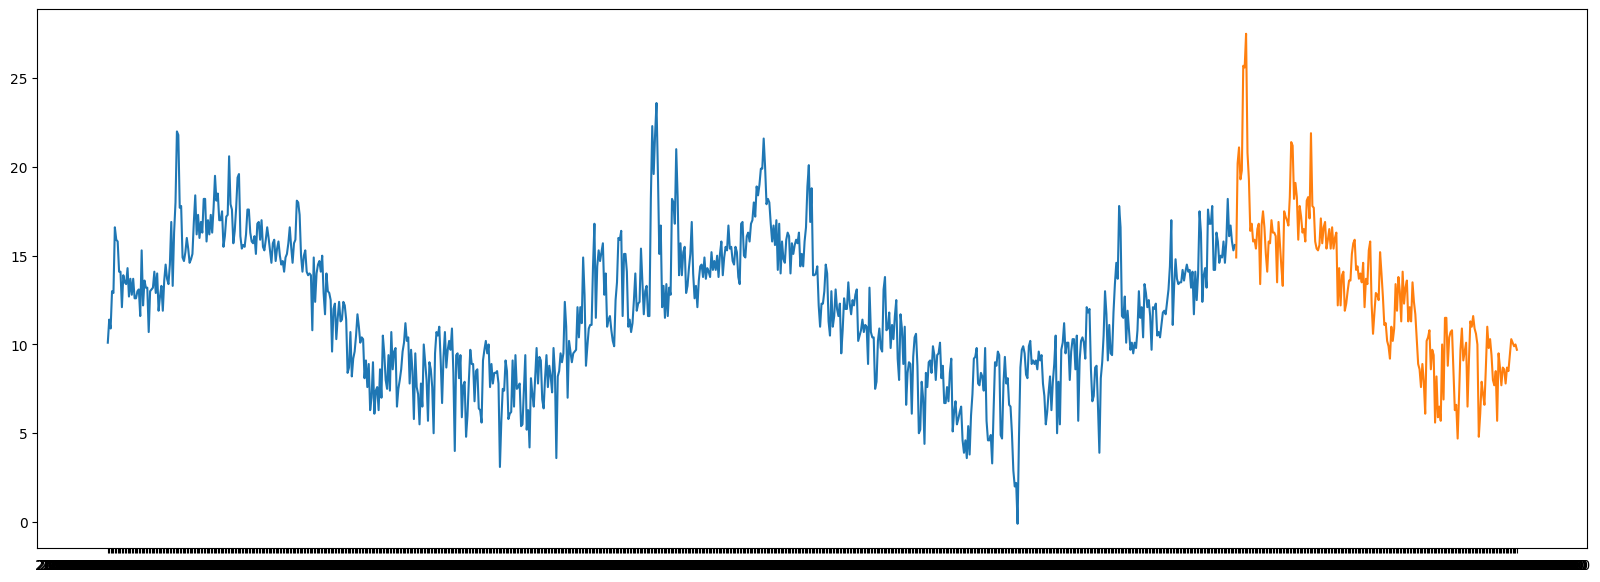

In [6]:
plt.figure(figsize=(20,7))
plt.plot(data_train.index, data_train.temp)
plt.plot(data_test.index, data_test.temp)
plt.show()

In [7]:
estimator = DeepAREstimator(freq="d", 
                            prediction_length=36, 
                            trainer=Trainer(epochs=10))

In [11]:
training_data = ListDataset(
    [{"start": data_train.index[0], "target": data_train.temp}],
    freq = "d"
)

In [12]:
predictor = estimator.train(training_data=training_data)

100%|█████████| 50/50 [00:03<00:00, 15.35it/s, epoch=10/10, avg_epoch_loss=1.78]


In [66]:
test_data = ListDataset(
    [{"start": data_test.index[0], "target": data_test.temp}],
    freq = "d"
)

In [27]:
ts_it

In [26]:
forecast_it

<generator object GluonPredictor.predict at 0x7fc887451740>

In [24]:
test_entry = next(iter(forecast_it))

StopIteration: 

In [51]:
forecasts

[gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=numpy.array([[14.50406265258789, 14.165873527526855, 15.481319427490234, 14.186287879943848, 14.611367225646973, 15.633561134338379, 13.113645553588867, 14.461962699890137, 16.213167190551758, 15.47895622253418, 16.60089874267578, 13.87851619720459, 13.124608039855957, 14.259852409362793, 14.899981498718262, 15.379024505615234, 17.21807861328125, 16.787691116333008, 16.549976348876953, 14.90062141418457, 16.06205940246582, 15.124189376831055, 14.826111793518066, 15.725981712341309, 14.764958381652832, 14.328495979309082, 15.240347862243652, 13.771961212158203, 14.84060287475586, 14.202466011047363, 13.707660675048828, 13.691000938415527, 13.907005310058594, 13.436100959777832, 15.342147827148438, 13.942124366760254], [15.322752952575684, 13.704421043395996, 13.906976699829102, 14.977296829223633, 15.284576416015625, 15.35608196258545, 16.903072357177734, 15.91287899017334, 15.474860191345215, 15.467187881469727, 15

In [48]:
test

,0
date,
2021-12-27 12:00:00,1434.537599
2021-12-28 12:00:00,1382.943749
2021-12-29 12:00:00,1442.625539
2021-12-30 12:00:00,1429.940153
2021-12-31 12:00:00,1466.977828
2022-01-01 12:00:00,1463.715037
2022-01-02 12:00:00,1474.292994
2022-01-03 12:00:00,1459.952941
2022-01-04 12:00:00,1480.125881


In [19]:
from gluonts.evaluation.backtest import make_evaluation_predictions

forecast_it, ts_it = make_evaluation_predictions(training_data, predictor=predictor)
forecasts = list(forecast_it)
tss = list(ts_it)

In [47]:
test = pd.DataFrame(data = total_fc, index = data.index[-36:])

In [42]:
total_fc = np.zeros(36)
for i in range(len(forecasts[0].samples)):
    total_fc+=forecasts[0].samples[i]
    total_fc

In [ ]:
#Adapt this function to plot the train set and the test set and the predictions.

from itertools import islice
from gluonts.evaluation.backtest import make_evaluation_predictions
cpt=0
def plot_forecasts(tss, forecasts, past_length, num_plots):
    for target, forecast in islice(zip(tss, forecasts), num_plots):
        ax = target[-past_length:].plot(figsize=(12, 5), linewidth=2)
        forecast.plot(color='g')
        print(forecast[0])
        print(cpt)
        #st.dataframe(forecast)
        plt.grid(which='both')
        plt.legend(["observations", "median prediction", "90% confidence interval", "50% confidence interval"])
        plt.show()

forecast_it, ts_it = make_evaluation_predictions(test_data, predictor=predictor)
forecasts = list(forecast_it)
tss = list(ts_it)
plot_forecasts(tss, forecasts, past_length=1500, num_plots=3)

In [ ]:
forecast

In [ ]:
evaluator = Evaluator(quantiles=[0.5])

agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_data))
agg_metrics

In [ ]:
training_data2= ListDataset(
    [{"start": data_train.index[0], "target": data_train.temp, "feat_dynamic_real": data_train[["wetb","dewpt","vappr","rhum"]]}],
    freq = "d"
)

In [ ]:
estimator = DeepAREstimator(freq="d", 
                            prediction_length=36, 
                            trainer=Trainer(epochs=10))
predictor = estimator.train(training_data=training_data2)

In [ ]:
test_data2 = ListDataset(
    [{"start": data_test.index[0], "target": data_test.temp, "feat_dynamic_real": data_test[["wetb","dewpt","vappr","rhum"]]}],
    freq = "d"
)

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(test_data2, predictor=predictor)
forecasts = list(forecast_it)
tss = list(ts_it)

In [ ]:
evaluator = Evaluator(quantiles=[0.5])

agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_data2))
agg_metrics

In [ ]:
print(forecasts)

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(test_data2, predictor=predictor)
forecasts = list(forecast_it)
tss = list(ts_it)

In [ ]:
evaluator = Evaluator(quantiles=[0.5])

agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_data2))
agg_metrics

In [ ]:
print(forecasts)

In [ ]:
evaluator = Evaluator(quantiles=[0.5])

agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_data2))
agg_metrics

In [ ]:
print(forecasts)

## Essais AR

On va forecast les 36 dernière valeurs du dataset de test.

In [6]:
res = AutoReg(data_test[:-36].temp, lags=None, exog = data_test[:-36][["wetb","dewpt","vappr","rhum"]]).fit()

/Users/arthurboivert/venv38/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [7]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   temp   No. Observations:                  164
Model:                   AutoReg-X(0)   Log Likelihood                  36.342
Method:               Conditional MLE   S.D. of innovations              0.194
Date:                Sat, 31 Dec 2022   AIC                            -60.684
Time:                        09:11:02   BIC                            -42.085
Sample:                    07-16-2021   HQIC                           -53.134
                         - 12-26-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6505      1.097     12.447      0.000      11.501      15.800
wetb           0.5933      0.125      4.758      0.000       0.349       0.838
dewpt          0.4969      0.114      4.352      0.000       0.273       0.721
vappr         -0.0335      0.036     -0.938      0.348      -0.103       0.036
rhum          -0.1460      0.011    -13.209      0.000      -0.168      -0.124
==============================================================================
"""

In [8]:
pred = res.predict(start = data_test.index[-36], end = data_test.index[-1], exog_oos =data_test[-36:][["wetb","dewpt","vappr","rhum"]] )

/Users/arthurboivert/venv38/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [9]:
data_test.index = pd.to_datetime(data_test.index)

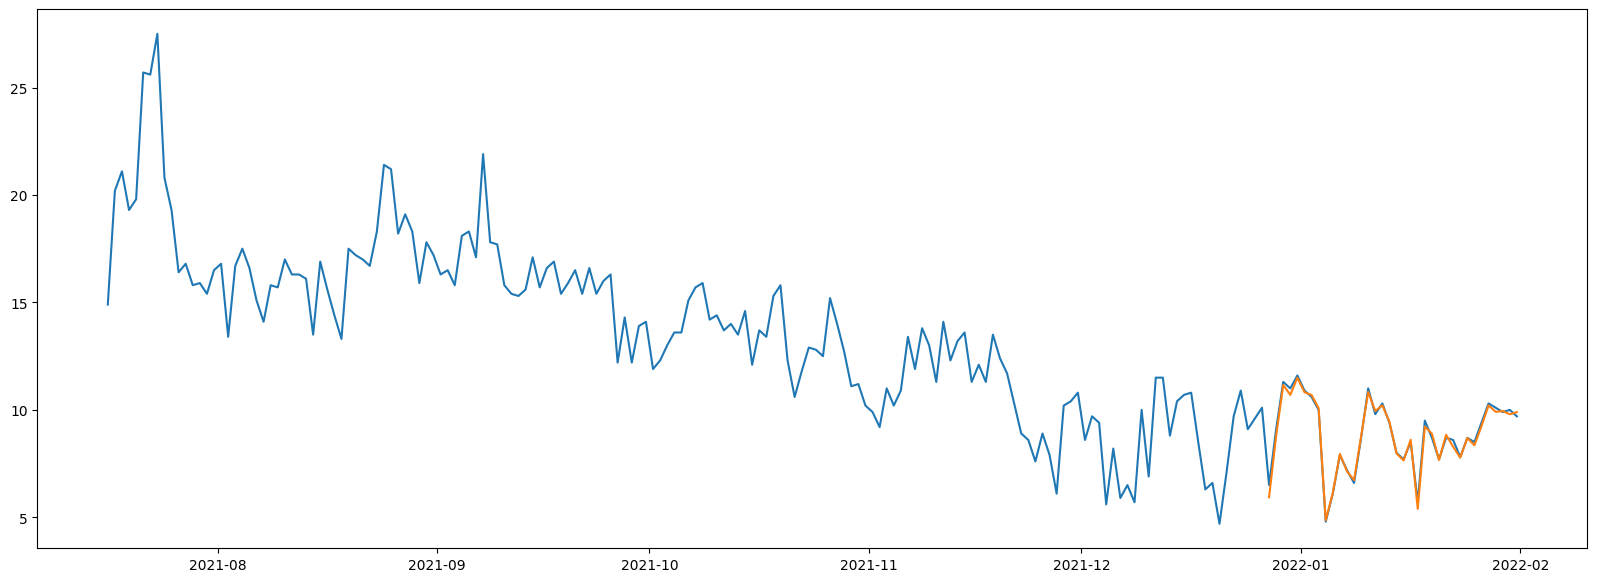

In [10]:
plt.figure(figsize = (20,7))
plt.plot(data_test.index,data_test.temp)
plt.plot(pred.index,pred.values)
plt.show()

In [12]:
data_test.index

DatetimeIndex(['2021-07-16 12:00:00', '2021-07-17 12:00:00',
               '2021-07-18 12:00:00', '2021-07-19 12:00:00',
               '2021-07-20 12:00:00', '2021-07-21 12:00:00',
               '2021-07-22 12:00:00', '2021-07-23 12:00:00',
               '2021-07-24 12:00:00', '2021-07-25 12:00:00',
               ...
               '2022-01-22 12:00:00', '2022-01-23 12:00:00',
               '2022-01-24 12:00:00', '2022-01-25 12:00:00',
               '2022-01-26 12:00:00', '2022-01-27 12:00:00',
               '2022-01-28 12:00:00', '2022-01-29 12:00:00',
               '2022-01-30 12:00:00', '2022-01-31 12:00:00'],
              dtype='datetime64[ns]', name='date', length=200, freq=None)

In [1]:
pred

NameError: name 'pred' is not defined

In [55]:
def plot_forecast(data, pred, model):
    fig = plt.figure(figsize = (20,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(data.temp)
    if model == "AR" or model == "Both":
        ax.plot(pred)
    elif model == "DeepAR" or model == "Both":
        total_fc_dar = np.zeros(36)
        for i in range(len(pred[0].samples)):
            total_fc_dar += pred[0].samples[i]
        total_fc_dar = total_fc_dar/len(pred[0].samples)
        pred_dar = pd.DataFrame(data=total_fc_dar, index=data.index[-36:])
        ax.plot(pred_dar)
    return fig

TypeError: float() argument must be a string or a number, not 'Figure'

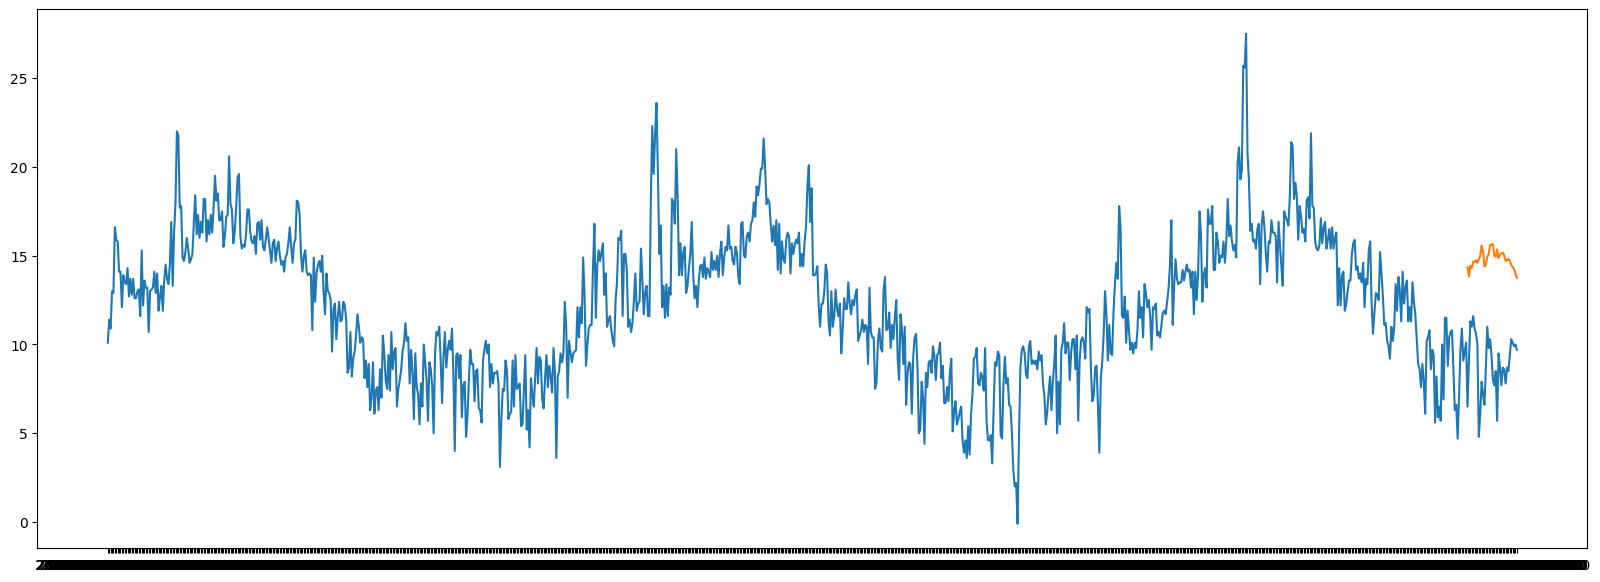

In [56]:
plt.plot(plot_forecast(data, forecasts,"DeepAR"))

In [57]:
def final_forecasting(data):
    res = AutoReg(data[800:964].temp, lags=None, exog=data[800:964][["wetb", "dewpt", "vappr", "rhum"]]).fit()
    pred_ar = res.predict(start=data.index[-36], end=data.index[-1], exog_oos=data[-36:][["wetb", "dewpt", "vappr",
                                                                                          "rhum"]])
    summary_ar = res.summary()
    training_data = ListDataset([{"start": str(data[:800].index[0]), "target": data[:800].temp,
                                  "feat_dynamic_real": data[:800][["wetb", "dewpt", "vappr", "rhum"]]}], freq="d")
    estimator = DeepAREstimator(freq="d",
                                prediction_length=36,
                                trainer=Trainer(epochs=10))
    predictor = estimator.train(training_data=training_data)
    forecast_data = ListDataset(
        [{"start": str(data[-200:].index[0]), "target": data[-200:].temp,
          "feat_dynamic_real": data[-200:][["wetb", "dewpt", "vappr", "rhum"]]}],
        freq="d"
    )
    forecast_it, ts_it = make_evaluation_predictions(forecast_data, predictor=predictor)
    forecast = list(forecast_it)
    tss = list(ts_it)
    evaluator = Evaluator(quantiles=[0.5])
    agg_metrics, item_metrics = evaluator(iter(tss), iter(forecast), num_series=len(forecast_data))
    summary_deepar = agg_metrics
    pred_deepar = forecast
    return pred_ar, summary_ar, summary_deepar, pred_deepar


In [59]:
a,b,c,d=final_forecasting(data)

/Users/arthurboivert/venv38/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/arthurboivert/venv38/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
Running evaluation: 100%|█████████████████████████| 1/1 [00:00<00:00,  7.55it/s]


In [63]:
d

[gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=numpy.array([[8.792807579040527, 10.436924934387207, 9.985167503356934, 8.97348690032959, 9.160615921020508, 7.060320854187012, 6.7435736656188965, 7.60430908203125, 4.2111496925354, 4.919745445251465, 7.62556266784668, 8.823577880859375, 9.216318130493164, 8.469551086425781, 8.539472579956055, 8.18246078491211, 9.523402214050293, 13.372574806213379, 10.660000801086426, 10.650077819824219, 8.088125228881836, 8.487756729125977, 9.013429641723633, 5.050565242767334, 7.9231696128845215, 6.503604888916016, 8.6784029006958, 8.465991973876953, 8.606266021728516, 8.632611274719238, 8.188648223876953, 8.994161605834961, 9.585667610168457, 10.215600967407227, 9.700575828552246, 14.834294319152832], [7.1393656730651855, 7.149240970611572, 4.281647682189941, 7.294906139373779, 8.574206352233887, 7.280503749847412, 4.248422145843506, 7.250145435333252, 8.512218475341797, 7.039065361022949, 5.528717517852783, 5.690540790557861,